# **Stress Level Prediction**

For Stress Level Prediction we will use 2 algorithms:

1.Decision Tree Regressor

2.Random Forest Regressor

By using the above algorithms, we will firstly explore the data that we have and check for any null or missing values. If found then we'll clean tha data and then visualize it for better understanding.Then we'll proceed by data training i.e. spliting data into training and testing data.Then train our model by providing training data and once the model will be trained, we will perform prediction. After prediction, we will evaluate the performance of these algorithmns by error check and accuracy check.

Steps followed are as:

Step 1:Data Exploration

Step 2: Data Cleaning

Step 3: Data Visualization

Step 4:Data training

Step 5: Model Creation

Step 6: Performance Evaluation

For the dataset being used [Click here](https://www.kaggle.com/shivamb/ideal-student-life-survey?select=survey_responses.csv)

## Data Exploration

In [238]:
import pandas as pd

In [239]:
data=pd.read_csv('/content/survey_responses.csv')
data

,Career,Citizenship,Nationality,Year since Matriculation,Year of Study,Primary Programme,Gender,Department,Housing Type,Q1-How many events have you Volunteered in ?,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q4-How many activities are you Passionate about ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?,Q8-About How events are you aware about ?,response_id,Q9-What is an ideal student life ?
0,UGRD,Foreigner,Indonesia,2,2,Bachelor of Science,F,School of Science,Residences,0,1,3,1,1,2,2.0,2.0,1,NaN
1,UGRD,Country Citizen,Singapore,1,1,Bachelor of Engineering,F,School of Engineering,Out of Campus,0,1,2,3,1,2,2.0,3.0,2,Friends+CCas+good result
2,UGRD,Foreigner,Malaysia,2,2,Bachelor of Science,M,School of Science,Halls,3,1,1,5,2,2,2.0,2.0,3,just want everything to go smooth. serious
3,UGRD,Foreigner,Malaysia,2,2,Bachelor of Engineering,M,School of Engineering,Halls,3,4,3,3,7,1,1.0,1.0,4,NaN
4,UGRD,Foreigner,Viet Nam,3,3,Bachelor of Engineering,F,School of Engineering,Out of Campus,4,3,4,5,4,2,2.0,2.0,5,a mixture of both academic and non-academic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,UGRD,Country Citizen,Singapore,1,1,Bachelor of Science,F,School of Science,Out of Campus,0,1,5,8,3,2,NaN,NaN,2954,The ideal student life is about able to balanc...
2954,UGRD,Country Citizen,Singapore,2,2,"Bach. of Med.,Bach. of Surg.",M,School of Medicine1,Out of Campus,1,1,5,2,1,2,NaN,NaN,2955,Work-life balance with time for leisure activi...
2955,GRAD,Foreigner,China,1,1,Master of Science (Track 1),F,School of Science,Out of Campus,0,1,1,2,1,3,NaN,NaN,2956,NaN
2956,GRAD,Foreigner,China,4,4,Doctor of Philosophy (FoE),M,School of Engineering,Out of Campus,3,2,6,2,3,3,NaN,NaN,2957,NaN


In [240]:
data.shape

(2958, 19)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Career                                                    2958 non-null   object 
 1   Citizenship                                               2958 non-null   object 
 2   Nationality                                               2958 non-null   object 
 3   Year since Matriculation                                  2958 non-null   int64  
 4   Year of Study                                             2958 non-null   int64  
 5   Primary Programme                                         2958 non-null   object 
 6   Gender                                                    2958 non-null   object 
 7   Department                                                2958 non-null   object 
 8   Housing Type      

In [242]:
data.columns

Index(['Career', 'Citizenship', 'Nationality', 'Year since Matriculation',
       'Year of Study', 'Primary Programme', 'Gender', 'Department',
       'Housing Type', 'Q1-How many events have you Volunteered in ?',
       'Q2-How many events have you Participated in ?',
       'Q3-How many activities are you Interested in ?',
       'Q4-How many activities are you Passionate about ?',
       'Q5-What are your levels of stress ?',
       'Q6-How Satisfied You are with your Student Life ?',
       'Q7-How much effort do you make to interact with others ?',
       'Q8-About How events are you aware about ?', 'response_id',
       'Q9-What is an ideal student life ?'],
      dtype='object')

In [243]:
data.tail()

,Career,Citizenship,Nationality,Year since Matriculation,Year of Study,Primary Programme,Gender,Department,Housing Type,Q1-How many events have you Volunteered in ?,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q4-How many activities are you Passionate about ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?,Q8-About How events are you aware about ?,response_id,Q9-What is an ideal student life ?
2953,UGRD,Country Citizen,Singapore,1,1,Bachelor of Science,F,School of Science,Out of Campus,0,1,5,8,3,2,NaN,NaN,2954,The ideal student life is about able to balanc...
2954,UGRD,Country Citizen,Singapore,2,2,"Bach. of Med.,Bach. of Surg.",M,School of Medicine1,Out of Campus,1,1,5,2,1,2,NaN,NaN,2955,Work-life balance with time for leisure activi...
2955,GRAD,Foreigner,China,1,1,Master of Science (Track 1),F,School of Science,Out of Campus,0,1,1,2,1,3,NaN,NaN,2956,NaN
2956,GRAD,Foreigner,China,4,4,Doctor of Philosophy (FoE),M,School of Engineering,Out of Campus,3,2,6,2,3,3,NaN,NaN,2957,NaN
2957,UGRD,Permanent Resident,China,1,1,Bachelor of Science,F,School of Science,Halls,2,2,4,2,3,2,NaN,NaN,2958,My ideal student life is having study-life bal...


In [244]:
data.tail()

,Career,Citizenship,Nationality,Year since Matriculation,Year of Study,Primary Programme,Gender,Department,Housing Type,Q1-How many events have you Volunteered in ?,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q4-How many activities are you Passionate about ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?,Q8-About How events are you aware about ?,response_id,Q9-What is an ideal student life ?
2953,UGRD,Country Citizen,Singapore,1,1,Bachelor of Science,F,School of Science,Out of Campus,0,1,5,8,3,2,NaN,NaN,2954,The ideal student life is about able to balanc...
2954,UGRD,Country Citizen,Singapore,2,2,"Bach. of Med.,Bach. of Surg.",M,School of Medicine1,Out of Campus,1,1,5,2,1,2,NaN,NaN,2955,Work-life balance with time for leisure activi...
2955,GRAD,Foreigner,China,1,1,Master of Science (Track 1),F,School of Science,Out of Campus,0,1,1,2,1,3,NaN,NaN,2956,NaN
2956,GRAD,Foreigner,China,4,4,Doctor of Philosophy (FoE),M,School of Engineering,Out of Campus,3,2,6,2,3,3,NaN,NaN,2957,NaN
2957,UGRD,Permanent Resident,China,1,1,Bachelor of Science,F,School of Science,Halls,2,2,4,2,3,2,NaN,NaN,2958,My ideal student life is having study-life bal...


In [245]:
#check for null values
data.isnull().sum()

Career                                                        0
Citizenship                                                   0
Nationality                                                   0
Year since Matriculation                                      0
Year of Study                                                 0
Primary Programme                                             0
Gender                                                        0
Department                                                    0
Housing Type                                                  0
Q1-How many events have you Volunteered in ?                  0
Q2-How many events have you Participated in ?                 0
Q3-How many activities are you Interested in ?                0
Q4-How many activities are you Passionate about ?             0
Q5-What are your levels of stress ?                           0
Q6-How Satisfied You are with your Student Life ?             0
Q7-How much effort do you make to intera

## Data Cleaning

In [246]:
data['Q7-How much effort do you make to interact with others ?'].isnull().sum()

18

In [247]:
data['Q7-How much effort do you make to interact with others ?'].mode()

0    2.0
dtype: float64

In [248]:
data['Q7-How much effort do you make to interact with others ?'].fillna('2',inplace=True)

In [249]:
data['Q7-How much effort do you make to interact with others ?'].isnull().sum()

0

In [250]:
data['Q8-About How events are you aware about ?'].isnull().sum()

18

In [251]:
data['Q8-About How events are you aware about ?'].mode()

0    2.0
dtype: float64

In [252]:
data['Q8-About How events are you aware about ?'].fillna('2',inplace=True)

In [253]:
data['Q8-About How events are you aware about ?'].isnull().sum()

0

In [254]:
data.isnull().sum()

Career                                                        0
Citizenship                                                   0
Nationality                                                   0
Year since Matriculation                                      0
Year of Study                                                 0
Primary Programme                                             0
Gender                                                        0
Department                                                    0
Housing Type                                                  0
Q1-How many events have you Volunteered in ?                  0
Q2-How many events have you Participated in ?                 0
Q3-How many activities are you Interested in ?                0
Q4-How many activities are you Passionate about ?             0
Q5-What are your levels of stress ?                           0
Q6-How Satisfied You are with your Student Life ?             0
Q7-How much effort do you make to intera

In [255]:
newdata=data.drop(['Year since Matriculation','response_id','Q9-What is an ideal student life ?'],axis=1)
newdata

,Career,Citizenship,Nationality,Year of Study,Primary Programme,Gender,Department,Housing Type,Q1-How many events have you Volunteered in ?,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q4-How many activities are you Passionate about ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?,Q8-About How events are you aware about ?
0,UGRD,Foreigner,Indonesia,2,Bachelor of Science,F,School of Science,Residences,0,1,3,1,1,2,2,2
1,UGRD,Country Citizen,Singapore,1,Bachelor of Engineering,F,School of Engineering,Out of Campus,0,1,2,3,1,2,2,3
2,UGRD,Foreigner,Malaysia,2,Bachelor of Science,M,School of Science,Halls,3,1,1,5,2,2,2,2
3,UGRD,Foreigner,Malaysia,2,Bachelor of Engineering,M,School of Engineering,Halls,3,4,3,3,7,1,1,1
4,UGRD,Foreigner,Viet Nam,3,Bachelor of Engineering,F,School of Engineering,Out of Campus,4,3,4,5,4,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,UGRD,Country Citizen,Singapore,1,Bachelor of Science,F,School of Science,Out of Campus,0,1,5,8,3,2,2,2
2954,UGRD,Country Citizen,Singapore,2,"Bach. of Med.,Bach. of Surg.",M,School of Medicine1,Out of Campus,1,1,5,2,1,2,2,2
2955,GRAD,Foreigner,China,1,Master of Science (Track 1),F,School of Science,Out of Campus,0,1,1,2,1,3,2,2
2956,GRAD,Foreigner,China,4,Doctor of Philosophy (FoE),M,School of Engineering,Out of Campus,3,2,6,2,3,3,2,2


In [256]:
newdata.columns

Index(['Career', 'Citizenship', 'Nationality', 'Year of Study',
       'Primary Programme', 'Gender', 'Department', 'Housing Type',
       'Q1-How many events have you Volunteered in ?',
       'Q2-How many events have you Participated in ?',
       'Q3-How many activities are you Interested in ?',
       'Q4-How many activities are you Passionate about ?',
       'Q5-What are your levels of stress ?',
       'Q6-How Satisfied You are with your Student Life ?',
       'Q7-How much effort do you make to interact with others ?',
       'Q8-About How events are you aware about ?'],
      dtype='object')

In [257]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 16 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Career                                                    2958 non-null   object
 1   Citizenship                                               2958 non-null   object
 2   Nationality                                               2958 non-null   object
 3   Year of Study                                             2958 non-null   int64 
 4   Primary Programme                                         2958 non-null   object
 5   Gender                                                    2958 non-null   object
 6   Department                                                2958 non-null   object
 7   Housing Type                                              2958 non-null   object
 8   Q1-How many events have you 

## Data Visualization

In [258]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [259]:
newdata['Career'].value_counts()

UGRD    2694
GRAD     218
NGRD      46
Name: Career, dtype: int64

Text(0.5, 1.0, 'Career ')

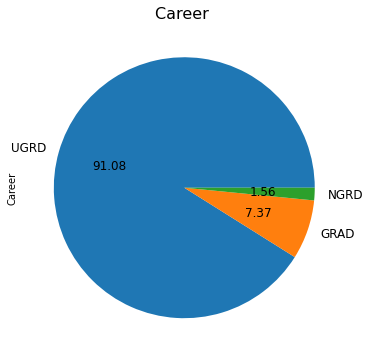

In [260]:
newdata['Career'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title('Career ',fontsize=16)

Most of the people are from undergraduate career.

In [261]:
newdata['Citizenship'].value_counts()

Country Citizen       2467
Foreigner              343
Permanent Resident     148
Name: Citizenship, dtype: int64

Text(0.5, 1.0, 'Citizenship')

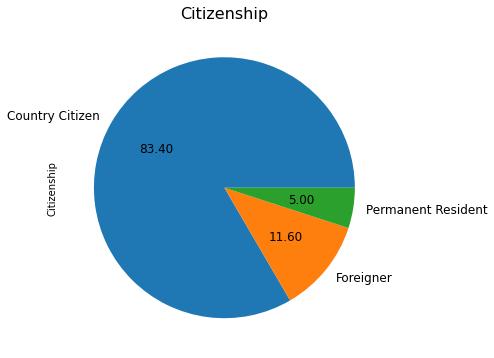

In [262]:
newdata['Citizenship'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title('Citizenship',fontsize=16)

Most od the people are Country Citizen.

In [263]:
newdata['Nationality'].value_counts()

Singapore                    2467
China                         158
Malaysia                      130
India                          47
Indonesia                      39
Viet Nam                       20
Canada                         17
United States                  15
Taiwan                         13
Korea, Republic of             10
Myanmar                         7
Hong Kong                       4
Germany                         3
Thailand                        3
Philippines                     3
Bangladesh                      2
Sri Lanka                       2
Mexico                          2
United Kingdom                  2
Nepal                           2
Japan                           2
Netherlands                     1
British National Overseas       1
Australia                       1
Poland                          1
Switzerland                     1
Turkey                          1
Denmark                         1
Israel                          1
Pakistan      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


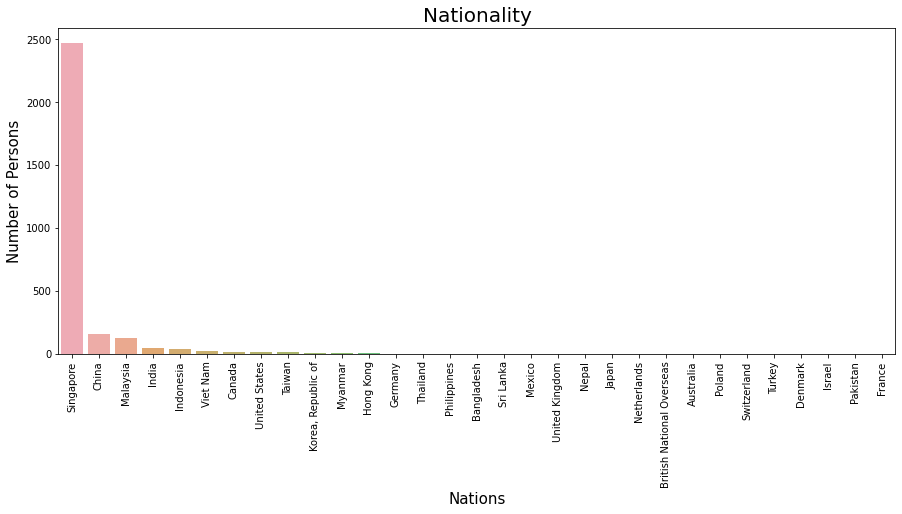

In [264]:
count1=newdata['Nationality'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('Nationality', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Nations', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Most of people are from Singapore.

In [265]:
newdata['Year of Study'].value_counts()

1    1018
2     819
3     635
4     465
5      21
Name: Year of Study, dtype: int64

Text(0.5, 1.0, 'Year Of Study')

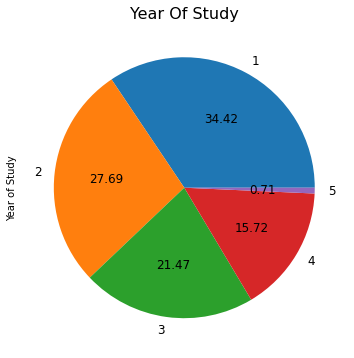

In [266]:
newdata['Year of Study'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title('Year Of Study',fontsize=16)

Most people are in the first year of their study field.

In [267]:
newdata['Primary Programme'].value_counts()

Bachelor of Arts              609
Bachelor of Engineering       511
Bachelor of Science           482
Bachelor of Business Admin    307
Bachelor of Science (SDE)     132
                             ... 
Non-Exchange (Coursework)       1
Doctor of Philosophy (CQT)      1
Graduate Diploma (FASS)         1
Master of Science (RMI)         1
Master of Arts                  1
Name: Primary Programme, Length: 68, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


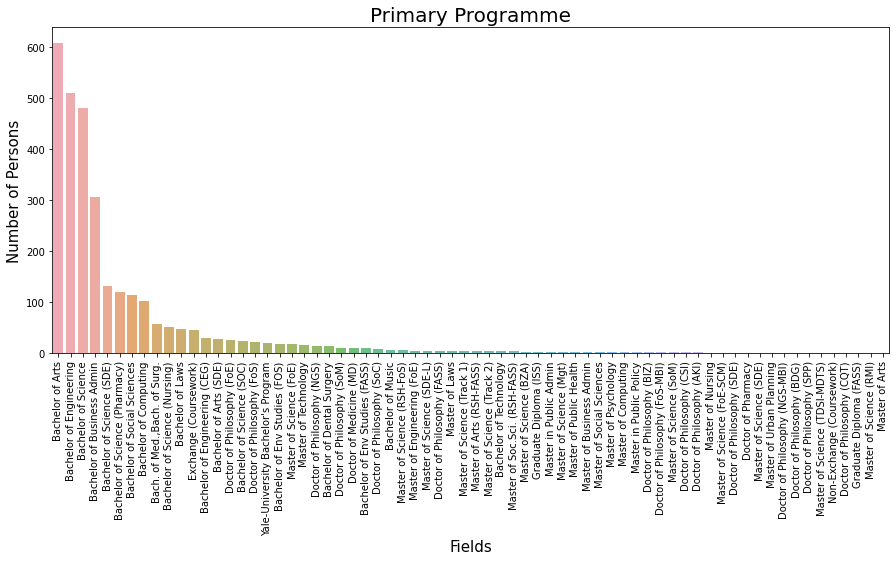

In [268]:
count1=newdata['Primary Programme'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('Primary Programme', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Fields', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Most people are from Bachelor of Arts, Bachelor of Engineering and Bachelor of Science

In [269]:
newdata['Gender'].value_counts()

F    1899
M    1059
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Gender')

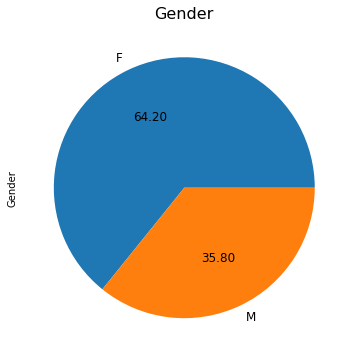

In [270]:
newdata['Gender'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title('Gender',fontsize=16)

In [271]:
newdata['Department'].value_counts()

School of Arts & Social Science           743
School of Science                         661
School of Engineering                     562
School of Business School                 318
School of Design & Environment            171
School of Computing                       138
School of Medicine1                       126
School of Law                              53
School of Exchange Students                46
School of Multi Disciplinary Programme     31
School of Foreign College                  30
School of Systems Science                  19
School of International Science            16
School of Dentistry                        14
School of Medicine2                        10
School of Public Policy                     6
School of Conservatory of Music             6
School of Public Health                     3
School of Cont & Lifelong Edun              3
School of Risk Management                   1
School of Defence System                    1
Name: Department, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


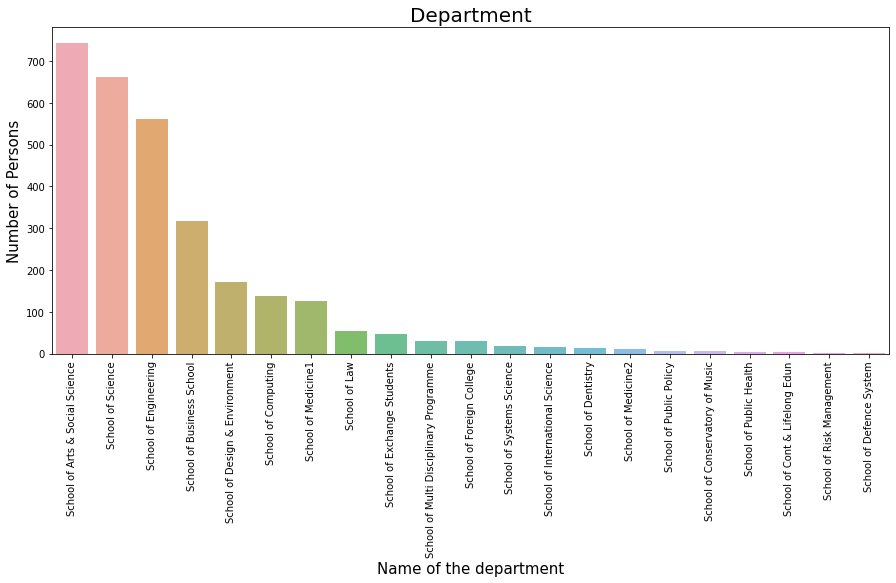

In [272]:
count1=newdata['Department'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('Department', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Name of the department', fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [273]:
newdata['Housing Type'].value_counts()

Out of Campus           2038
Halls                    523
Residential Colleges     263
Residences               134
Name: Housing Type, dtype: int64

Text(0.5, 1.0, 'Housing Type')

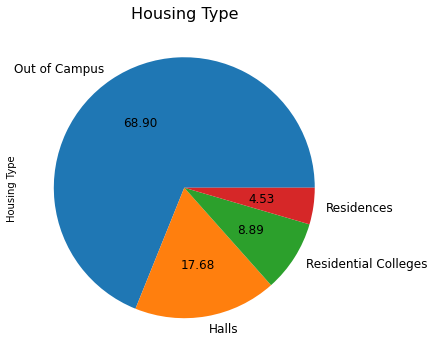

In [274]:
newdata['Housing Type'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title('Housing Type',fontsize=16)

Most of the people live outside the campus.

Visualizations for Survey Questions:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


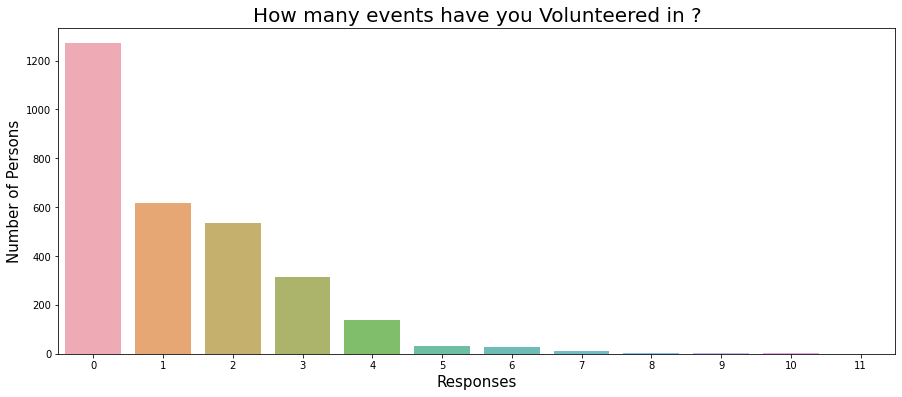

In [275]:
count1=newdata['Q1-How many events have you Volunteered in ?'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('How many events have you Volunteered in ?', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Responses', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


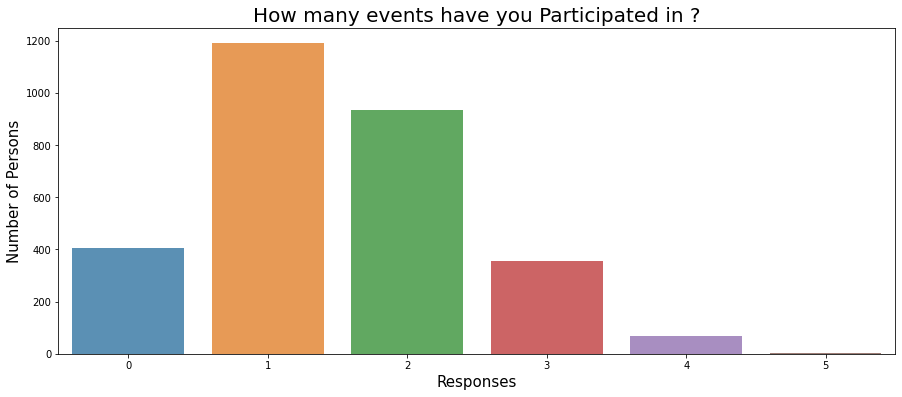

In [276]:
count1=newdata['Q2-How many events have you Participated in ?'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('How many events have you Participated in ?', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Responses', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


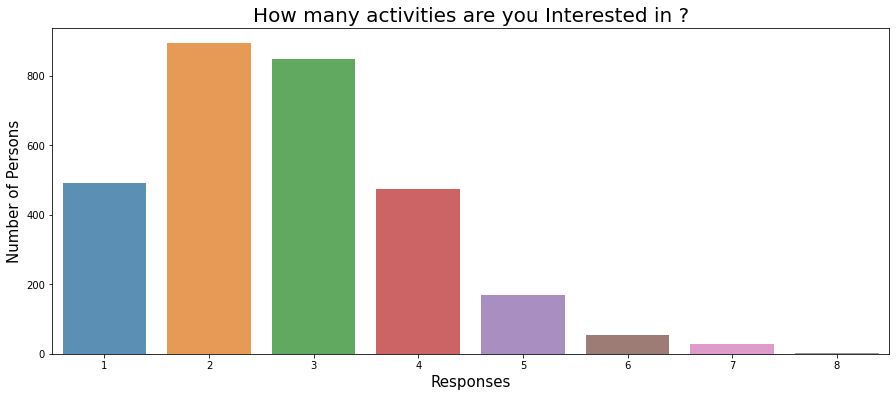

In [277]:
count1=newdata['Q3-How many activities are you Interested in ?'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('How many activities are you Interested in ?', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Responses', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


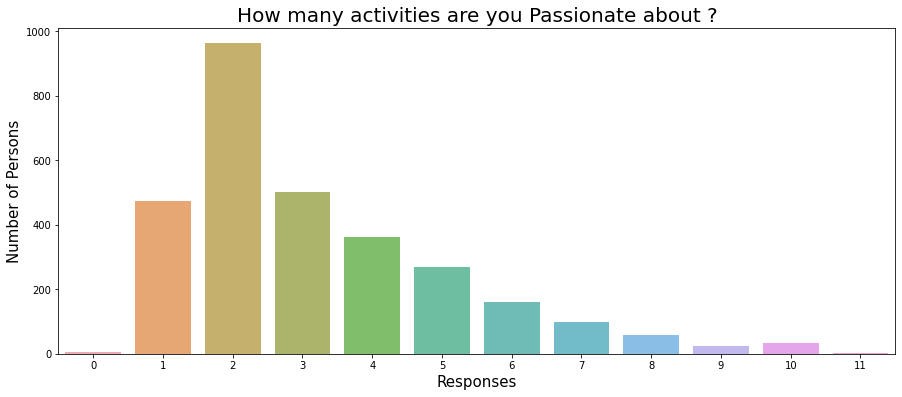

In [278]:
count1=newdata['Q4-How many activities are you Passionate about ?'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('How many activities are you Passionate about ?', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Responses', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


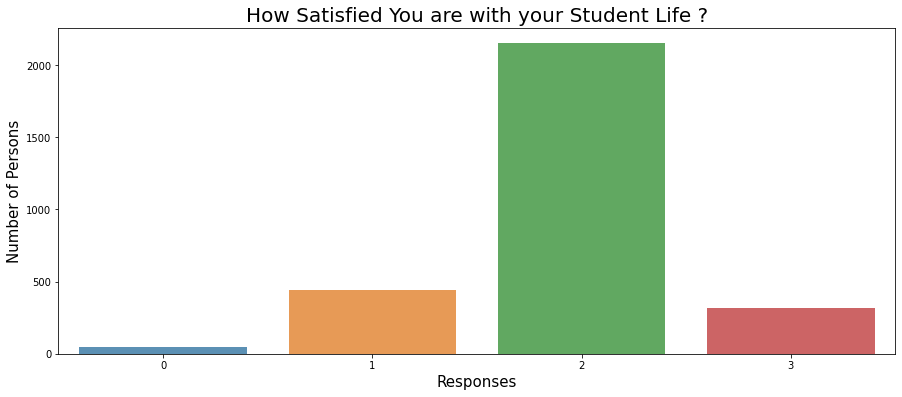

In [279]:
count1=newdata['Q6-How Satisfied You are with your Student Life ?'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('How Satisfied You are with your Student Life ?', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Responses', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


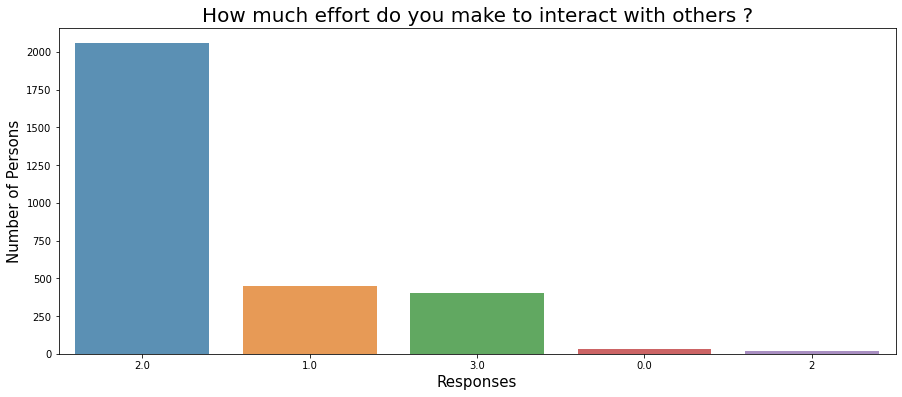

In [280]:
count1=newdata['Q7-How much effort do you make to interact with others ?'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('How much effort do you make to interact with others ?', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Responses', fontsize=15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


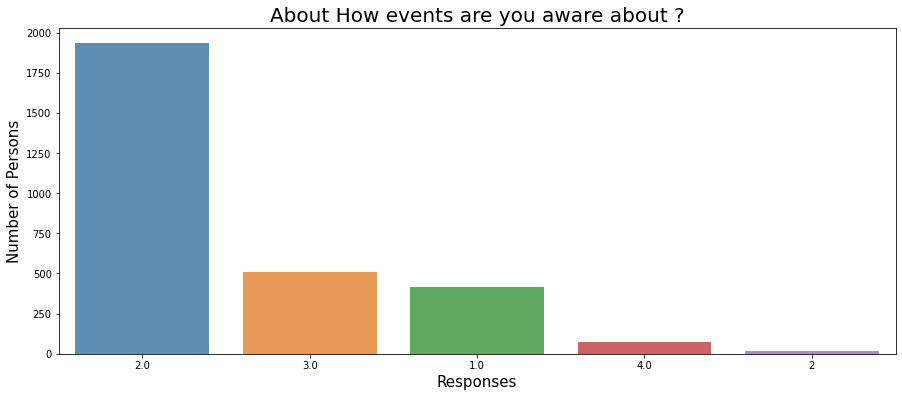

In [281]:
count1=newdata['Q8-About How events are you aware about ?'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(count1.index,count1.values, alpha=0.8)
plt.title('About How events are you aware about ?', fontsize=20)
plt.ylabel('Number of Persons', fontsize=15)
plt.xlabel('Responses', fontsize=15)
plt.show()

## Data Training

In [282]:
newdata.columns

Index(['Career', 'Citizenship', 'Nationality', 'Year of Study',
       'Primary Programme', 'Gender', 'Department', 'Housing Type',
       'Q1-How many events have you Volunteered in ?',
       'Q2-How many events have you Participated in ?',
       'Q3-How many activities are you Interested in ?',
       'Q4-How many activities are you Passionate about ?',
       'Q5-What are your levels of stress ?',
       'Q6-How Satisfied You are with your Student Life ?',
       'Q7-How much effort do you make to interact with others ?',
       'Q8-About How events are you aware about ?'],
      dtype='object')

In [283]:
prepareddata=newdata.drop(['Career', 'Citizenship', 'Nationality', 'Year of Study','Primary Programme', 'Gender', 'Department', 'Housing Type'],axis=1)
prepareddata

,Q1-How many events have you Volunteered in ?,Q2-How many events have you Participated in ?,Q3-How many activities are you Interested in ?,Q4-How many activities are you Passionate about ?,Q5-What are your levels of stress ?,Q6-How Satisfied You are with your Student Life ?,Q7-How much effort do you make to interact with others ?,Q8-About How events are you aware about ?
0,0,1,3,1,1,2,2,2
1,0,1,2,3,1,2,2,3
2,3,1,1,5,2,2,2,2
3,3,4,3,3,7,1,1,1
4,4,3,4,5,4,2,2,2
...,...,...,...,...,...,...,...,...
2953,0,1,5,8,3,2,2,2
2954,1,1,5,2,1,2,2,2
2955,0,1,1,2,1,3,2,2
2956,3,2,6,2,3,3,2,2


In [284]:
#converting data into int datatype to avoid errors below.
prepareddata=prepareddata.astype(int)
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 8 columns):
 #   Column                                                    Non-Null Count  Dtype
---  ------                                                    --------------  -----
 0   Q1-How many events have you Volunteered in ?              2958 non-null   int64
 1   Q2-How many events have you Participated in ?             2958 non-null   int64
 2   Q3-How many activities are you Interested in ?            2958 non-null   int64
 3   Q4-How many activities are you Passionate about ?         2958 non-null   int64
 4   Q5-What are your levels of stress ?                       2958 non-null   int64
 5   Q6-How Satisfied You are with your Student Life ?         2958 non-null   int64
 6   Q7-How much effort do you make to interact with others ?  2958 non-null   int64
 7   Q8-About How events are you aware about ?                 2958 non-null   int64
dtypes: int64(8)
memory usage: 185.0 KB


In [285]:
prepareddata.columns

Index(['Q1-How many events have you Volunteered in ?',
       'Q2-How many events have you Participated in ?',
       'Q3-How many activities are you Interested in ?',
       'Q4-How many activities are you Passionate about ?',
       'Q5-What are your levels of stress ?',
       'Q6-How Satisfied You are with your Student Life ?',
       'Q7-How much effort do you make to interact with others ?',
       'Q8-About How events are you aware about ?'],
      dtype='object')

In [286]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features and y will have our target i.e. stress.
x=prepareddata[['Q1-How many events have you Volunteered in ?',
       'Q2-How many events have you Participated in ?',
       'Q3-How many activities are you Interested in ?',
       'Q4-How many activities are you Passionate about ?','Q6-How Satisfied You are with your Student Life ?',
       'Q7-How much effort do you make to interact with others ?',
       'Q8-About How events are you aware about ?']]  
y=prepareddata['Q5-What are your levels of stress ?']

In [287]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=500) 
#Ratio used for splitting training and testing data is 8:2 respectively.

In [288]:
#to view length of training data.
len(x_train)

2366

In [289]:
#to view length of testing data.
len(x_test)

592

## Model Creation

Decision Tree Regressor

In [290]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg1 = DecisionTreeRegressor()

In [291]:
#Fitting data into the model.
reg1.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [292]:
# Making predictions on Test data 
pred1 = reg1.predict(x_test)

In [293]:
pred1

array([3.25      , 3.5       , 4.        , 2.5       , 2.        ,
       2.5       , 5.        , 4.6       , 3.33333333, 2.        ,
       2.        , 1.33333333, 1.66666667, 2.625     , 2.        ,
       2.        , 2.        , 5.        , 3.        , 3.        ,
       2.5       , 4.        , 4.        , 1.        , 4.        ,
       2.        , 6.        , 3.25      , 4.        , 3.        ,
       3.        , 1.        , 3.        , 2.4       , 2.625     ,
       4.        , 3.66666667, 3.        , 3.        , 3.        ,
       1.        , 2.5       , 1.        , 2.        , 2.        ,
       1.        , 2.        , 4.        , 3.        , 3.14285714,
       3.        , 5.        , 1.        , 4.33333333, 2.        ,
       3.5       , 4.        , 1.        , 2.53846154, 3.5       ,
       2.        , 4.        , 5.        , 4.66666667, 3.        ,
       1.66666667, 3.        , 3.66666667, 2.        , 4.        ,
       4.        , 4.5       , 2.        , 2.75      , 1.83333

In [294]:
print("Accuracy of the Decision Tree Regressor  model comes to be: \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model comes to be: 
 
0.7248791634252187


Random Forest Regressor

In [295]:
#Importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor 
reg2 = RandomForestRegressor(n_estimators=100)

In [296]:
# Fitting data into the model.
reg2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [297]:
#making predictions.
pred2 = reg2.predict(x_test)

In [298]:
pred2

array([3.24970868, 3.23557143, 3.97733333, 2.45307143, 2.03598453,
       2.49285326, 5.53      , 4.44140476, 3.30159524, 3.90490476,
       3.8005    , 1.94902778, 1.70054762, 2.67296764, 1.77916667,
       3.55842857, 2.50633333, 5.07841667, 2.97742857, 3.11666667,
       2.54391053, 4.36      , 3.31821373, 1.85516667, 3.49466667,
       2.02198413, 5.05955556, 3.24970868, 3.55360761, 3.03486684,
       5.70790476, 1.57888095, 2.92      , 2.39952958, 2.62643115,
       3.55360761, 3.43703258, 3.03486684, 3.26216667, 3.30391667,
       2.2025    , 2.38888095, 1.96835714, 2.66      , 3.074     ,
       1.85516667, 2.02659524, 4.04      , 3.1425    , 3.01108855,
       3.4       , 3.64609524, 2.04416667, 4.34607959, 2.077     ,
       3.55278571, 3.53      , 3.27333333, 2.56442962, 3.31636905,
       3.955     , 3.15183333, 4.74255952, 4.67757143, 2.46833333,
       1.68306417, 2.89185714, 3.66302381, 4.00672222, 3.99114286,
       3.17381061, 3.52583333, 2.31347344, 2.77123268, 1.88424

In [299]:
print("Accuracy of the Random Forest Regressor  model comes to be: \n ") 
print(reg2.score(x_train,y_train))

Accuracy of the Random Forest Regressor  model comes to be: 
 
0.6476213171383199


## Performnace Evaluation

In [300]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t RootMeanSquareError \t\t Accuracy of the model") 
print("""Decision Tree Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Random Forest Regressor\t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))

Model			 RootMeanSquareError 		 Accuracy of the model
Decision Tree Regressor		 2.1656 	 		 0.7249
Random Forest Regressor		 1.8237 	 		 0.6476


## Conclusion:
Decision tree regressor has more accuracy when compared to random forest regressor.